In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
np.random.seed(17)
from keras.models import load_model

In [5]:
BW = load_model('malaria_BW.h5')

In [6]:
RGB = load_model('malaria_cnn.h5')

In [ ]:
X_train = np.load('X_train.npy')
X_train_BW = np.load('X_train_bi.npy')
y_train = np.load('y_train.npy')
(X_train.shape,X_train.dtype),(X_train_BW.shape,X_train_BW.dtype),(y_train.shape,y_train.dtype)

(((17412, 128, 128, 3), dtype('uint8')),
 ((17412, 128, 128, 1), dtype('uint8')),
 ((17412, 2), dtype('float32')))

In [7]:
import tensorflow as tf

In [8]:
In1 = tf.keras.layers.Input(shape=(128,128,3),name='RGB')
In2 = tf.keras.layers.Input(shape=(128,128,1),name='BW')
output_RGB = RGB(In1)
output_BW = BW(In2)
Add = tf.keras.layers.add(inputs=[output_RGB,output_BW])
model =tf.keras.Model(inputs = [In1,In2],outputs =Add)
model.layers[2].trainable = False
model.layers[3].trainable = False
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
RGB (InputLayer)                [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
BW (InputLayer)                 [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 2)            1658022     RGB[0][0]                        
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 2)            1636838     BW[0][0]                         
______________________________________________________________________________________________

In [9]:
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix

In [10]:
X_test = np.load('X_test.npy')
X_test_BW = np.load('X_test_bi.npy')
y_test = np.load('y_test.npy')
(X_test.shape,X_test.dtype),(X_test_BW.shape,X_test_BW.dtype),(y_test.shape,y_test.dtype)

(((4353, 128, 128, 3), dtype('uint8')),
 ((4353, 128, 128, 1), dtype('uint8')),
 ((4353, 2), dtype('float32')))

In [82]:
def plot_confusion_matrix(cnf_matrix,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=14,
                 horizontalalignment="center",
                 verticalalignment = 'bottom',
                 color="white" if cm[i, j] > thresh else "black")
        plt.text(j, i, '{}{}{}'.format('(',cnf_matrix[i, j],')'),
                 horizontalalignment="center",
                 fontsize=10,
                 verticalalignment = 'top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
y_predict = model.predict([X_test,X_test_BW], batch_size=None, verbose=0, steps=None)

In [60]:
y_pred = np.argmax(y_predict,axis=1)
y_true = np.argmax(y_test,axis=1)

Normalized confusion matrix
[[0.95582878 0.04417122]
 [0.04450626 0.95549374]]


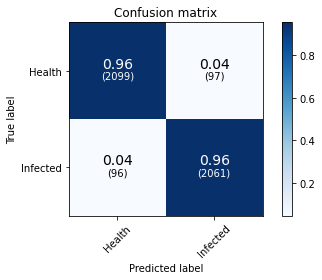

In [83]:
target_names = ['Health','Infected']
plt.figure()
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
plt.show()

In [ ]:
model.save('malaria_final.h5')